In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("..\data\P99\participant_99_Testing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_num           96 non-null     int64  
 1   move_times          96 non-null     float64
 2   wrist_x_end         96 non-null     float64
 3   wrist_y_end         96 non-null     float64
 4   curs_x_end          96 non-null     float64
 5   curs_y_end          96 non-null     float64
 6   end_angles          96 non-null     float64
 7   block               96 non-null     object 
 8   target_pos          96 non-null     int64  
 9   target_amp          96 non-null     int64  
 10  full_feedback       96 non-null     int64  
 11  terminal_feedback   96 non-null     int64  
 12  rotation_direction  96 non-null     int64  
 13  rotation            96 non-null     int64  
 14  rotation_angle      96 non-null     int64  
 15  clamp               96 non-null     int64  
 16  clamp_angl

In [2]:
data['error'] = data['target_pos'] - data['end_angles']
no_feedback_data = data[data['full_feedback'] == 0][['error', 'vibration', 'target_pos']]


print(no_feedback_data.groupby('vibration')['error'].describe())

           count      mean       std       min       25%       50%       75%  \
vibration                                                                      
0           20.0  2.257445  4.015440 -4.629348 -1.229821  2.484103  4.383928   
1           20.0  3.022095  5.148827 -7.338444  0.485239  3.009067  5.731352   
2           20.0  3.496558  4.800989 -4.769997 -0.570822  3.472927  7.035776   
3           20.0  2.127180  4.435204 -4.966674 -1.324826  1.387408  5.122341   

                 max  
vibration             
0          12.363160  
1          16.328855  
2          13.249244  
3           9.531697  


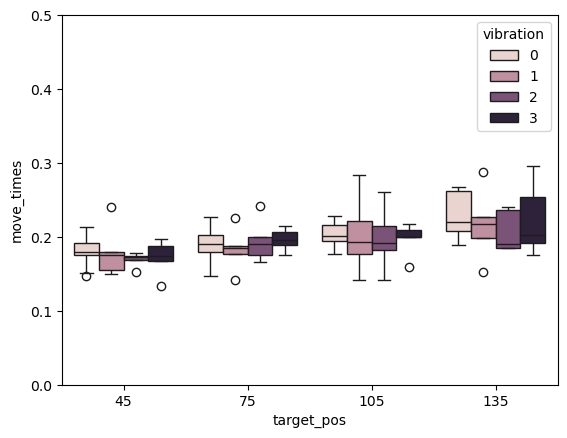

In [28]:
fig, ax = plt.subplots()

sns.boxplot(data=data,
        x='target_pos',
        y='move_times',
        hue="vibration",
        # dodge=True,
        ax=ax,
               )
# ax.set_xticklabels(["No Vibration", "Flexor Vibration", "Extensor Vibration", "Dual Vibration"])
ax.set_ylim([0,0.5])
plt.show()




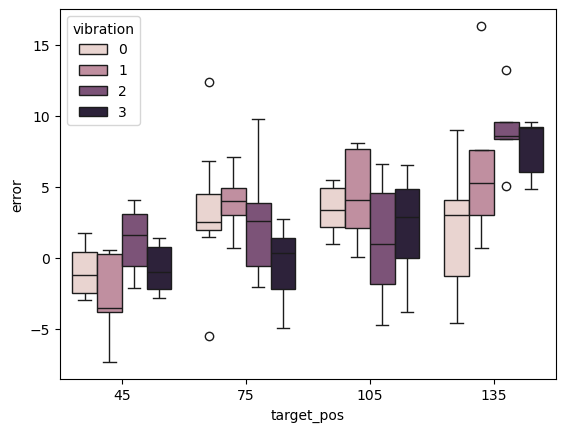

In [22]:
fig, ax = plt.subplots()

sns.boxplot(data=data,
        x='target_pos',
        y='error',
        hue="vibration",
        # dodge=True,
        ax=ax,
               )
# ax.set_xticklabels(["No Vibration", "Flexor Vibration", "Extensor Vibration", "Dual Vibration"])
plt.show()